In [1]:
import numpy as np

import random

def getD(G): 
    V = G.vertices()
    D = [None] + [(v,w,i) for v in V for w in G.neighbors(v) for i in [0,1]]
    return D

def twisted_faces2(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
            print(Rlist)
    R = Permutation(Rlist)
    print("R = ", R)
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))
        print(Llist)

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)
    print("L = ", L)
    print("twisted_faces = ", R*L)    
    return R*L #, R, L, D

def sample_number_of_twisted_faces(G,samples=10,do_twist=True):
    return [len(twisted_faces2(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

def equal(e,f):
    return set(e[0:2])==set(f[0:2])


def count_bad(G,do_twist=True):
    D = getD(G)
    F = twisted_faces2(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges(G,do_twist=True,samples=100):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return L


def number_of_CDC(G,do_twist=True,samples=10):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad(G,do_twist=do_twist))
    return CDC


def check_tw_faces(G):
    F,R,L,D = twisted_faces2(G)
    print(list(zip(D,range(100))))
    C = F.cycle_tuples()
    m = G.num_edges()
    assert(len(D) == 4*m+1)
    U = reduce(lambda x,y: x.union(y), [set(x) for x in C], set([]))
    assert(len(U) == 4*m)
    print(R.cycle_tuples())
    for vert in R.cycle_tuples():
        for x in vert:
            print(D[x])
        print('--')
    print('\n ===== \n')

    print(L.cycle_tuples())
    for edge in L.cycle_tuples():
        for x in edge:
            print(D[x])
        print('--')            

    print('\n ===== \n')
    print(F.cycle_tuples())
    for face in C:
        for d in face:
            print(D[d])

def twisted_faces3(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
    R = Permutation(Rlist)
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)  
    return R*L #, R, L, D






def sample_number_of_twisted_faces3(G,samples=10,do_twist=True):
    return [len(twisted_faces3(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

def equal(e,f):
    return set(e[0:2])==set(f[0:2])


def count_bad3(G,do_twist=True):
    D = getD(G)
    F = twisted_faces3(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges3(G,do_twist=True,samples=100):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad3(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad3(G,do_twist=do_twist))
    return L


def number_of_CDC3(G,do_twist=True,samples=10):
    CDC = 0
    L = []
    for i in range (samples):
        if count_bad3(G,do_twist=do_twist) == 0:
            CDC += 1
        L.append(count_bad3(G,do_twist=do_twist))
    return CDC


def change_tuple(x,y):
    L = (x,y)
    L = list(L)
    L.reverse()
    return tuple(L)


def Faces(G,do_twist=True):
    D = getD(G)
    F = twisted_faces3(G,do_twist=do_twist)
    bad = 0
    L = []
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        E = edges    
        E.append(E[0])
        for i in range(1, (len(E)-1)):
            (x,y) = E[i+1]
            for j in range(2):
                if E[i][1] != E[i+1][0]:
                    E[i+1] = change_tuple(x,y)
        E.remove(E[0])
        L.append(E)
    return L

def Num_Bad_Pos_Neg(G ,do_twist=True):
    
    L = Faces(G,do_twist=do_twist)

    Bad_Neg = 0
    List_Bad_Neg = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][0]:
                    if L[k][i][1] == L[k][j][1]:
                        Bad_Neg += 1
    print("Bad Negative = ", Bad_Neg/2)
    Bad_Pos = 0
    List_Bad_Pos = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][1]:
                    if L[k][i][1] == L[k][j][0]:
                        Bad_Pos += 1
    print("Bad Positive = ", Bad_Pos/2)
    return Bad_Neg/2, Bad_Pos/2


def Num_Bad_Pos_Neg1(G ,do_twist=True):
    
    L = Faces(G,do_twist=do_twist)

    Bad_Neg = 0
    List_Bad_Neg = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][0]:
                    if L[k][i][1] == L[k][j][1]:
                        Bad_Neg += 1
    Bad_Pos = 0
    List_Bad_Pos = []
    for k in range (len(L)):
        for i in range(len(L[k])):
            for j in range(i+1, len(L[k])):
                if L[k][i][0] == L[k][j][1]:
                    if L[k][i][1] == L[k][j][0]:
                        Bad_Pos += 1
    return Bad_Neg/2, Bad_Pos/2


def List_Bad_Pos_Neg(G ,do_twist=True):
    L = list(Num_Bad_Pos_Neg1(G ,do_twist=do_twist))
    return L


def exp_number_of_Bad_Neg_Pos(G,samples=10,do_twist=True):
    E = G.edges()
    e = len(E)
    Neg = []
    Pos = []
    g = []
    for i in range (samples):
        L = List_Bad_Pos_Neg(G,samples)
        g.append(e- (L[0]+L[1]))
        Neg.append(L[0])
        Pos.append(L[1])
    return [exp_size(Neg).n(20), exp_size(Pos).n(20), exp_size(g).n(20)]

    

In [2]:
G = graphs.CompleteGraph(4)

In [92]:
exp_number_of_Bad_Neg_Pos(G, samples = 1000, do_twist = True)

[2.1300, 1.6730, 2.1970]

In [3]:
pt = graphs.PetersenGraph()

In [94]:
exp_number_of_Bad_Neg_Pos(pt, samples = 1000, do_twist = True)

[5.1020, 4.5400, 5.3580]

In [4]:
R = graphs.RandomRegular(3,100)

In [98]:
exp_number_of_Bad_Neg_Pos(R, samples = 10000, do_twist = True)

[50.287, 49.802, 49.911]

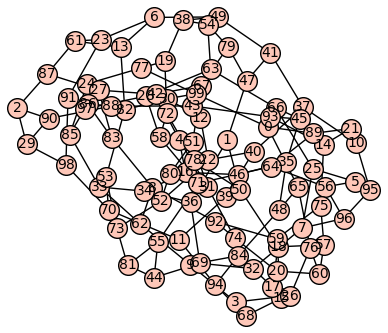

In [97]:
R.show()

In [5]:
def exp_number_of_Bad_Neg_Pos2(G,samples=10,do_twist=True):
    E = G.edges()
    e = len(E)
    Neg = []
    Pos = []
    g = []
    T = []
    for i in range (samples):
        L = List_Bad_Pos_Neg(G,samples)
        g.append(e-(L[0]+L[1]))
        Neg.append(L[0])
        Pos.append(L[1])
        L.append(e-(L[0]+L[1]))
        T.append(L)
    #Neg = sorted(Neg)
    #Pos = sorted(Pos)
    #g = sorted(g)
    return T
    #return [Neg, Pos, g]

    

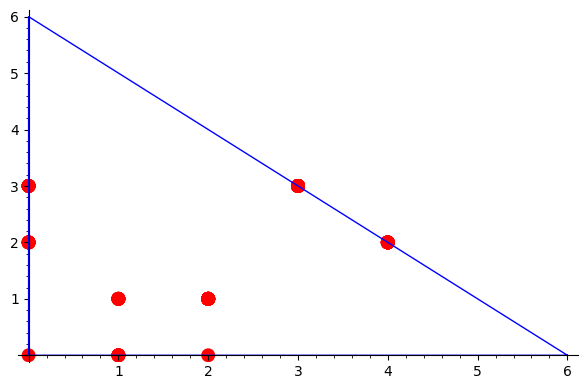

In [52]:
G = graphs.CompleteGraph(4)
L = exp_number_of_Bad_Neg_Pos2(G, samples=100)

line([(6,0),(0,6),(0,0),(6,0)])+points([(x[0],x[1]) for x in L], color='red', size=100)

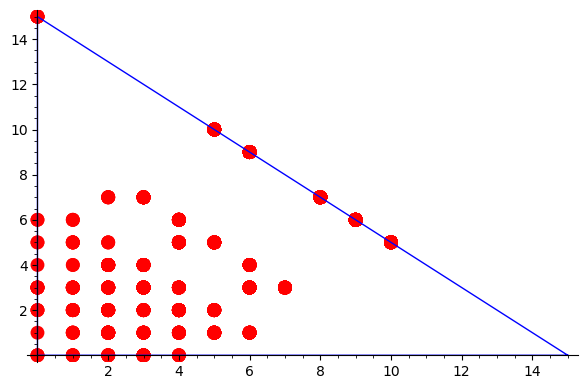

In [56]:
pt = graphs.PetersenGraph()
L = exp_number_of_Bad_Neg_Pos2(pt, samples=1000)
m = pt.num_edges()

line([(m,0),(0,m),(0,0),(m,0)])+points([(x[0],x[1]) for x in L], color='red', size=100)

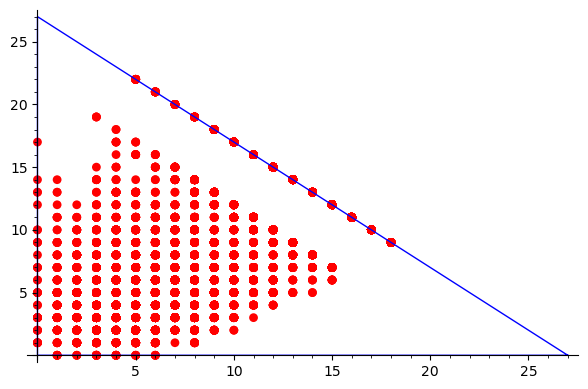

In [70]:
b1 = graphs.BlanusaFirstSnarkGraph()
L = exp_number_of_Bad_Neg_Pos2(b1, samples=10000)
m = b1.num_edges()

line([(m,0),(0,m),(0,0),(m,0)])+points([(x[0],x[1]) for x in L], color='red', size=40)

In [74]:
len([x for x in L if x[1]==0])

32

In [ ]:
points([(x[0],x[1]) for x in L])+line

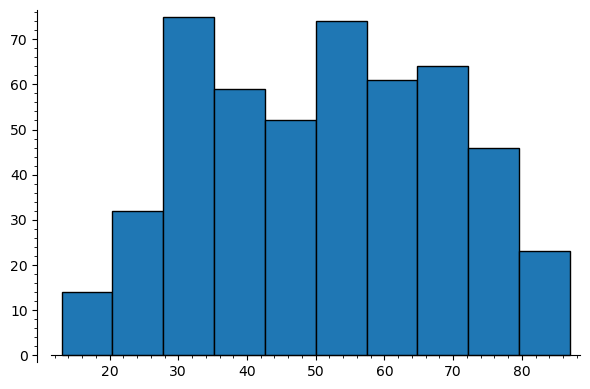

In [129]:
histogram(exp_number_of_Bad_Neg_Pos2(R,samples=500,do_twist=True)[0]).show()

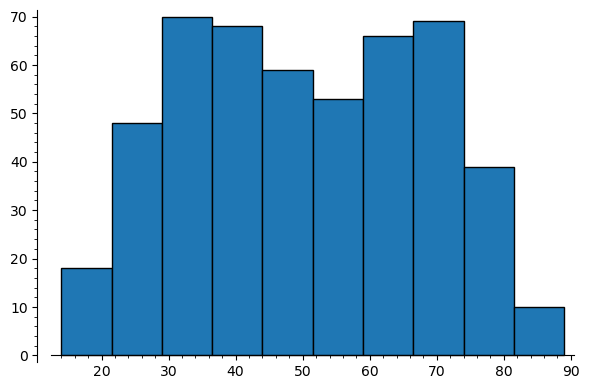

In [130]:
histogram(exp_number_of_Bad_Neg_Pos2(R,samples=500,do_twist=True)[1]).show()

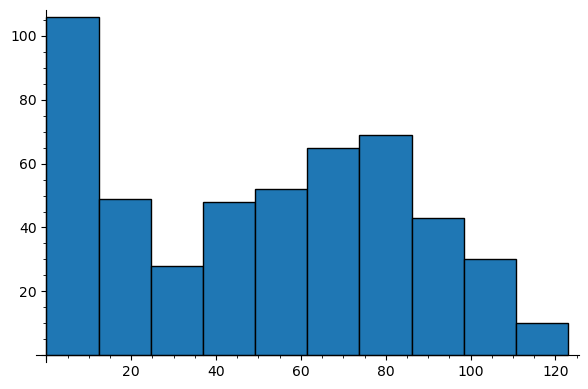

In [131]:
histogram(exp_number_of_Bad_Neg_Pos2(R,samples=500,do_twist=True)[2]).show()

In [132]:
R1 = graphs.RandomRegular(3,120)

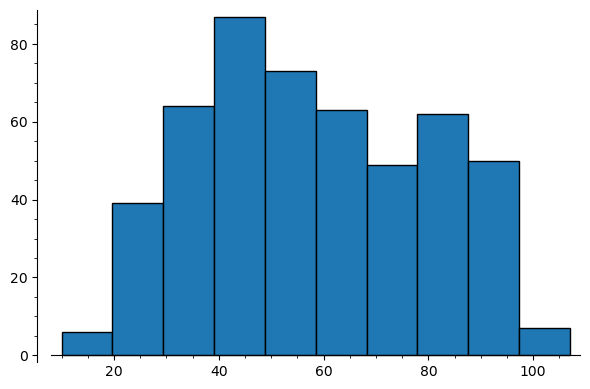

In [136]:
histogram(exp_number_of_Bad_Neg_Pos2(R1,samples=500,do_twist=True)[0]).show()

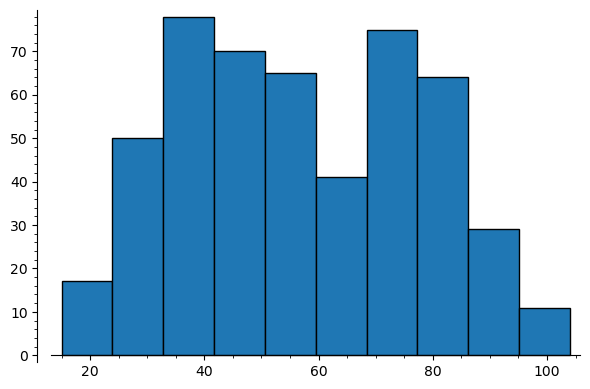

In [137]:
histogram(exp_number_of_Bad_Neg_Pos2(R1,samples=500,do_twist=True)[1]).show()

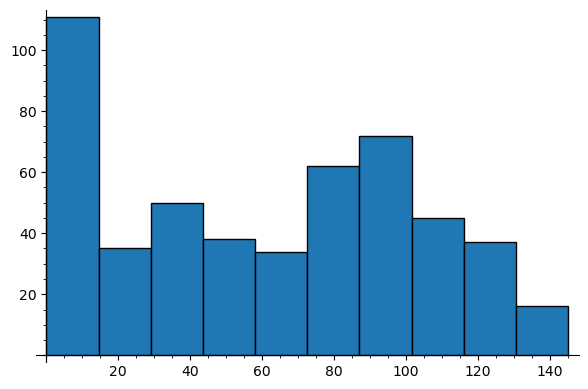

In [138]:
histogram(exp_number_of_Bad_Neg_Pos2(R1,samples=500,do_twist=True)[2]).show()

In [139]:
R2 = graphs.RandomRegular(3,20)

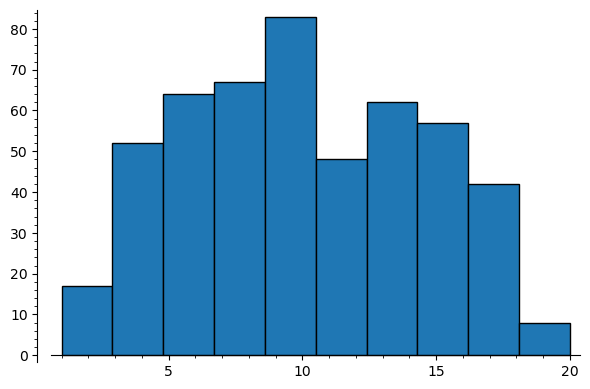

In [140]:
histogram(exp_number_of_Bad_Neg_Pos2(R2,samples=500,do_twist=True)[0]).show()

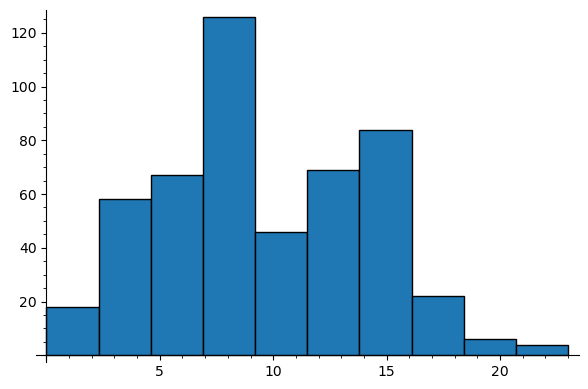

In [141]:
histogram(exp_number_of_Bad_Neg_Pos2(R2,samples=500,do_twist=True)[1]).show()

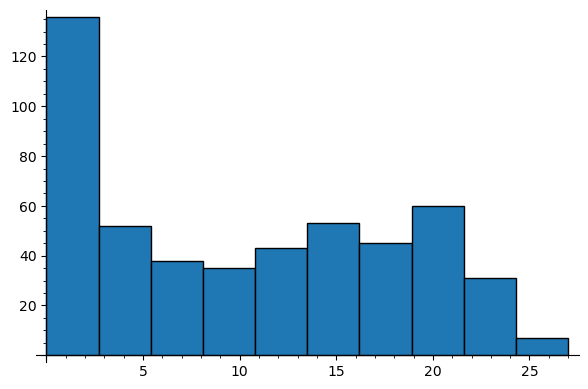

In [142]:
histogram(exp_number_of_Bad_Neg_Pos2(R2,samples=500,do_twist=True)[2]).show()

In [143]:
def exp_number_of_Bad_Neg_Pos3(G,samples=10,do_twist=True):
    E = G.edges()
    e = len(E)
    Neg = []
    Pos = []
    g = []
    T = []
    for i in range (samples):
        L = List_Bad_Pos_Neg(G,samples)
        g.append(e-(L[0]+L[1]))
        Neg.append(L[0])
        Pos.append(L[1])
        L.append(e-(L[0]+L[1]))
        T.append(L)
    return T

    

In [162]:
G = graphs.CompleteGraph(4)
sorted(exp_number_of_Bad_Neg_Pos3(G,samples=30,do_twist=True), key=lambda tup: tup[2])

[[4, 2, 0],
 [3, 3, 0],
 [4, 2, 0],
 [3, 3, 0],
 [3, 3, 0],
 [3, 3, 0],
 [4, 2, 0],
 [4, 2, 0],
 [3, 3, 0],
 [3, 3, 0],
 [3, 3, 0],
 [4, 2, 0],
 [3, 3, 0],
 [4, 2, 0],
 [3, 3, 0],
 [3, 3, 0],
 [3, 3, 0],
 [3, 3, 0],
 [2, 1, 3],
 [2, 1, 3],
 [2, 1, 3],
 [2, 1, 3],
 [2, 0, 4],
 [1, 1, 4],
 [2, 0, 4],
 [2, 0, 4],
 [2, 0, 4],
 [1, 0, 5],
 [1, 0, 5],
 [1, 0, 5]]

In [169]:
pt = graphs.PetersenGraph()
Exp = exp_number_of_Bad_Neg_Pos3(pt,samples=100,do_twist=True)

In [187]:
Exp = sorted(Exp, key=lambda tup: tup[0])
print([Exp[i][0] for i in range(len(Exp))])

[0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10]


In [188]:
def Sorted_List_Num_Good(G,samples=100,do_twist=True):
    Exp = exp_number_of_Bad_Neg_Pos3(G,samples=samples,do_twist=do_twist)
    Exp = sorted(Exp, key=lambda tup: tup[2])
    return [Exp[i][2] for i in range(len(Exp))]

def Sorted_List_Num_Bad_Neg(G,samples=100,do_twist=True):
    Exp = exp_number_of_Bad_Neg_Pos3(G,samples=samples,do_twist=do_twist)
    Exp = sorted(Exp, key=lambda tup: tup[0])
    return [Exp[i][0] for i in range(len(Exp))]

def Sorted_List_Num_Bad_Pos(G,samples=100,do_twist=True):
    Exp = exp_number_of_Bad_Neg_Pos3(G,samples=samples,do_twist=do_twist)
    Exp = sorted(Exp, key=lambda tup: tup[1])
    return [Exp[i][1] for i in range(len(Exp))]

In [189]:
G = graphs.CompleteGraph(4)

In [197]:
print(Sorted_List_Num_Good(G,samples=100,do_twist=True))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6]


In [198]:
print(Sorted_List_Num_Bad_Neg(G,samples=100,do_twist=True))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [199]:
print(Sorted_List_Num_Bad_Pos(G,samples=100,do_twist=True))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [200]:
pt = graphs.PetersenGraph()
print(Sorted_List_Num_Bad_Neg(pt,samples=100,do_twist=True))
print(Sorted_List_Num_Bad_Pos(pt,samples=100,do_twist=True))
print(Sorted_List_Num_Good(pt,samples=100,do_twist=True))

[0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10]
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 10, 10, 10, 10, 15]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 12, 12, 14, 14]


In [204]:
R100 = graphs.RandomRegular(3,50)
print("Bad_Neg = ", Sorted_List_Num_Bad_Neg(R100,samples=200,do_twist=True))
print("Bad_Pos = ", Sorted_List_Num_Bad_Pos(R100,samples=200,do_twist=True))
print("Good = ", Sorted_List_Num_Good(R100,samples=200,do_twist=True))

Bad_Neg =  [5, 6, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43]
Bad_Pos =  [5, 5, 8, 9, 9, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 1